### Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

### Data Collection

In [2]:
# Read the data
df = pd.read_csv("Data/nyra_2019_complete.csv", header=None, low_memory=False)

# View the data
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8


### Data Cleaning

In [3]:
# Rename the column names
df.rename(columns={0: "track_id", 1: "race_date", 2: "race_number",
                3: "program_number", 4: "trakus_index", 5: "latitude",
                6: "longitude", 7: "distance_id", 8: "course_type",
                9: "track_condition", 10: "run_up_distance", 11: "race_type",
                12: "post_time", 13: "purse", 14: "weight_carried", 
                15: "jockey", 16: "odds", 17: "position_at_finish"}, 
          inplace=True)

# View the df with new column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228430 entries, 0 to 5228429
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   track_id            object 
 1   race_date           object 
 2   race_number         int64  
 3   program_number      object 
 4   trakus_index        int64  
 5   latitude            float64
 6   longitude           float64
 7   distance_id         int64  
 8   course_type         object 
 9   track_condition     object 
 10  run_up_distance     int64  
 11  race_type           object 
 12  post_time           float64
 13  purse               int64  
 14  weight_carried      int64  
 15  jockey              object 
 16  odds                int64  
 17  position_at_finish  int64  
dtypes: float64(3), int64(8), object(7)
memory usage: 718.0+ MB


In [4]:
# Check for missing values
df.isnull().sum()

track_id              0
race_date             0
race_number           0
program_number        0
trakus_index          0
latitude              0
longitude             0
distance_id           0
course_type           0
track_condition       0
run_up_distance       0
race_type             0
post_time             0
purse                 0
weight_carried        0
jockey                0
odds                  0
position_at_finish    0
dtype: int64

In [5]:
# Numerical features
num_features = df._get_numeric_data().columns
print(num_features)
print(len(num_features))

Index(['race_number', 'trakus_index', 'latitude', 'longitude', 'distance_id',
       'run_up_distance', 'post_time', 'purse', 'weight_carried', 'odds',
       'position_at_finish'],
      dtype='object')
11


In [6]:
# Categorical features
cat_features = [col for col in df.columns if col not in num_features]
print(cat_features)
print(len(cat_features))

['track_id', 'race_date', 'program_number', 'course_type', 'track_condition', 'race_type', 'jockey']
7


In [7]:
# Data type + unit conversions
df['race_number'] = df['race_number'].astype(int)
df['purse'] = round(df['purse'].astype(float), 2)
df['odds'] = df['odds'] / 100

# View the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228430 entries, 0 to 5228429
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   track_id            object 
 1   race_date           object 
 2   race_number         int64  
 3   program_number      object 
 4   trakus_index        int64  
 5   latitude            float64
 6   longitude           float64
 7   distance_id         int64  
 8   course_type         object 
 9   track_condition     object 
 10  run_up_distance     int64  
 11  race_type           object 
 12  post_time           float64
 13  purse               float64
 14  weight_carried      int64  
 15  jockey              object 
 16  odds                float64
 17  position_at_finish  int64  
dtypes: float64(5), int64(6), object(7)
memory usage: 718.0+ MB


### EDA on Training Set

In [9]:
# Range of values for position_at_finish, mean = 4.481435
df['position_at_finish'].describe()

count    5.228430e+06
mean     4.481435e+00
std      2.568150e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      1.400000e+01
Name: position_at_finish, dtype: float64

**Use "filtered_df" from this point forward.**

In [10]:
# Narrow the analysis to rows where position_at_finish <= 8
filtered_df = df[df['position_at_finish'] <= 8]

# Check the code execution, mean = 4.039239
filtered_df['position_at_finish'].describe()

count    4.828592e+06
mean     4.039239e+00
std      2.121691e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      8.000000e+00
Name: position_at_finish, dtype: float64

In [11]:
# Number of observations removed from filtering the position_at_finish column
nrows_removed = len(df) - len(filtered_df)
print(nrows_removed)

399838


**Use "train" from this point forward.**

In [12]:
# Random 80:20 train/test split
train, test = train_test_split(filtered_df, test_size=0.2, random_state=7406)

# View the training set
train.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,post_time,purse,weight_carried,jockey,odds,position_at_finish
4479912,BEL,2019-09-08,5,10,309,40.714050,-73.724479,800,T,FM,77,MSW,62000.0,310.0,119,Joel Rosario,1.30,1
3889890,SAR,2019-08-07,7,1,324,43.071827,-73.771798,650,D,FT,72,CLM,52000.0,403.0,120,Dylan Davis,27.00,7
1878001,BEL,2019-05-18,2,7,80,40.717644,-73.726433,600,D,FT,56,MCL,33000.0,1230.0,124,Samuel Camacho Jr.,2.05,3
2929237,SAR,2019-07-21,5,2,74,43.070496,-73.772805,900,D,FT,76,MSW,90000.0,244.0,118,Jose L. Ortiz,3.05,6
4845113,AQU,2019-12-20,3,7,80,40.669949,-73.828913,800,D,FT,54,MCL,35000.0,128.0,121,Samuel Camacho Jr.,23.20,5


In [13]:
# View the testing set
test.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,post_time,purse,weight_carried,jockey,odds,position_at_finish
3400042,SAR,2019-08-11,7,11,156,43.069827,-73.770737,900,I,FM,63,ALW,80000.0,414.0,120,Junior Alvarado,8.10,8
2749208,AQU,2019-01-04,1,3,358,40.671810,-73.831802,800,D,FT,54,MSW,68000.0,1250.0,120,Rajiv Maragh,3.45,3
3353411,AQU,2019-01-20,3,7,182,40.674212,-73.830686,550,D,SY,52,MCL,35000.0,147.0,117,Reylu Gutierrez,5.60,3
1306821,AQU,2019-04-07,8,1,94,40.670693,-73.831540,850,T,FM,81,ALW,75000.0,519.0,123,Luis R. Reyes,35.75,8
2496562,BEL,2019-07-07,6,4,73,40.716691,-73.723790,600,I,FM,148,MCL,46000.0,313.0,118,John R. Velazquez,0.70,1


In [14]:
# Number of observations in the training and testing sets
print(len(train))
print(len(test))

3862873
965719


In [15]:
# Summary statistics
train.describe()

,race_number,trakus_index,latitude,longitude,distance_id,run_up_distance,post_time,purse,weight_carried,odds,position_at_finish
count,3.862873e+06,3.862873e+06,3.862873e+06,3.862873e+06,3.862873e+06,3.862873e+06,3.862873e+06,3.862873e+06,3.862873e+06,3.862873e+06,3.862873e+06
mean,5.389474e+00,1.839015e+02,4.119694e+01,-7.377674e+01,7.565257e+02,6.741677e+01,8.773679e+04,4.172762e+02,1.207584e+02,1.297212e+01,4.039712e+00
std,2.837519e+00,1.184105e+02,9.721196e-01,4.719349e-02,1.798399e+02,3.873134e+01,1.223444e+05,2.822005e+02,4.355578e+00,1.664474e+01,2.121685e+00
min,1.000000e+00,1.000000e+00,4.066671e+01,-7.383260e+01,4.500000e+02,0.000000e+00,1.600000e+04,1.000000e+02,1.100000e+02,0.000000e+00,1.000000e+00
25%,3.000000e+00,8.800000e+01,4.067347e+01,-7.382881e+01,6.000000e+02,4.500000e+01,4.200000e+04,2.300000e+02,1.190000e+02,3.150000e+00,2.000000e+00
50%,5.000000e+00,1.760000e+02,4.071393e+01,-7.376906e+01,8.000000e+02,5.400000e+01,6.200000e+04,3.460000e+02,1.200000e+02,6.600000e+00,4.000000e+00
75%,8.000000e+00,2.640000e+02,4.071737e+01,-7.372557e+01,8.500000e+02,7.800000e+01,8.000000e+04,5.150000e+02,1.230000e+02,1.530000e+01,6.000000e+00
max,1.300000e+01,1.062000e+03,4.307399e+01,-7.371483e+01,2.000000e+03,2.800000e+02,1.500000e+06,1.259000e+03,1.600000e+02,1.527500e+02,8.000000e+00


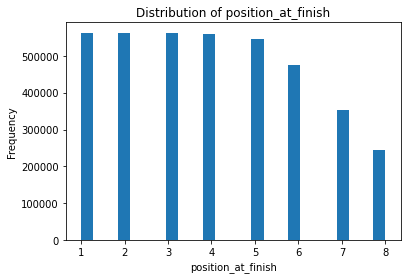

In [16]:
# Histogram of "position_at_finish"
plt.title('Distribution of position_at_finish')
plt.xlabel('position_at_finish')
plt.ylabel('Frequency')
plt.hist(x=train['position_at_finish'],bins=25);

In [17]:
# Class label proportions
train['position_at_finish'].value_counts(normalize=True)

2    0.145724
1    0.145635
3    0.145336
4    0.144673
5    0.141375
6    0.122844
7    0.091309
8    0.063102
Name: position_at_finish, dtype: float64

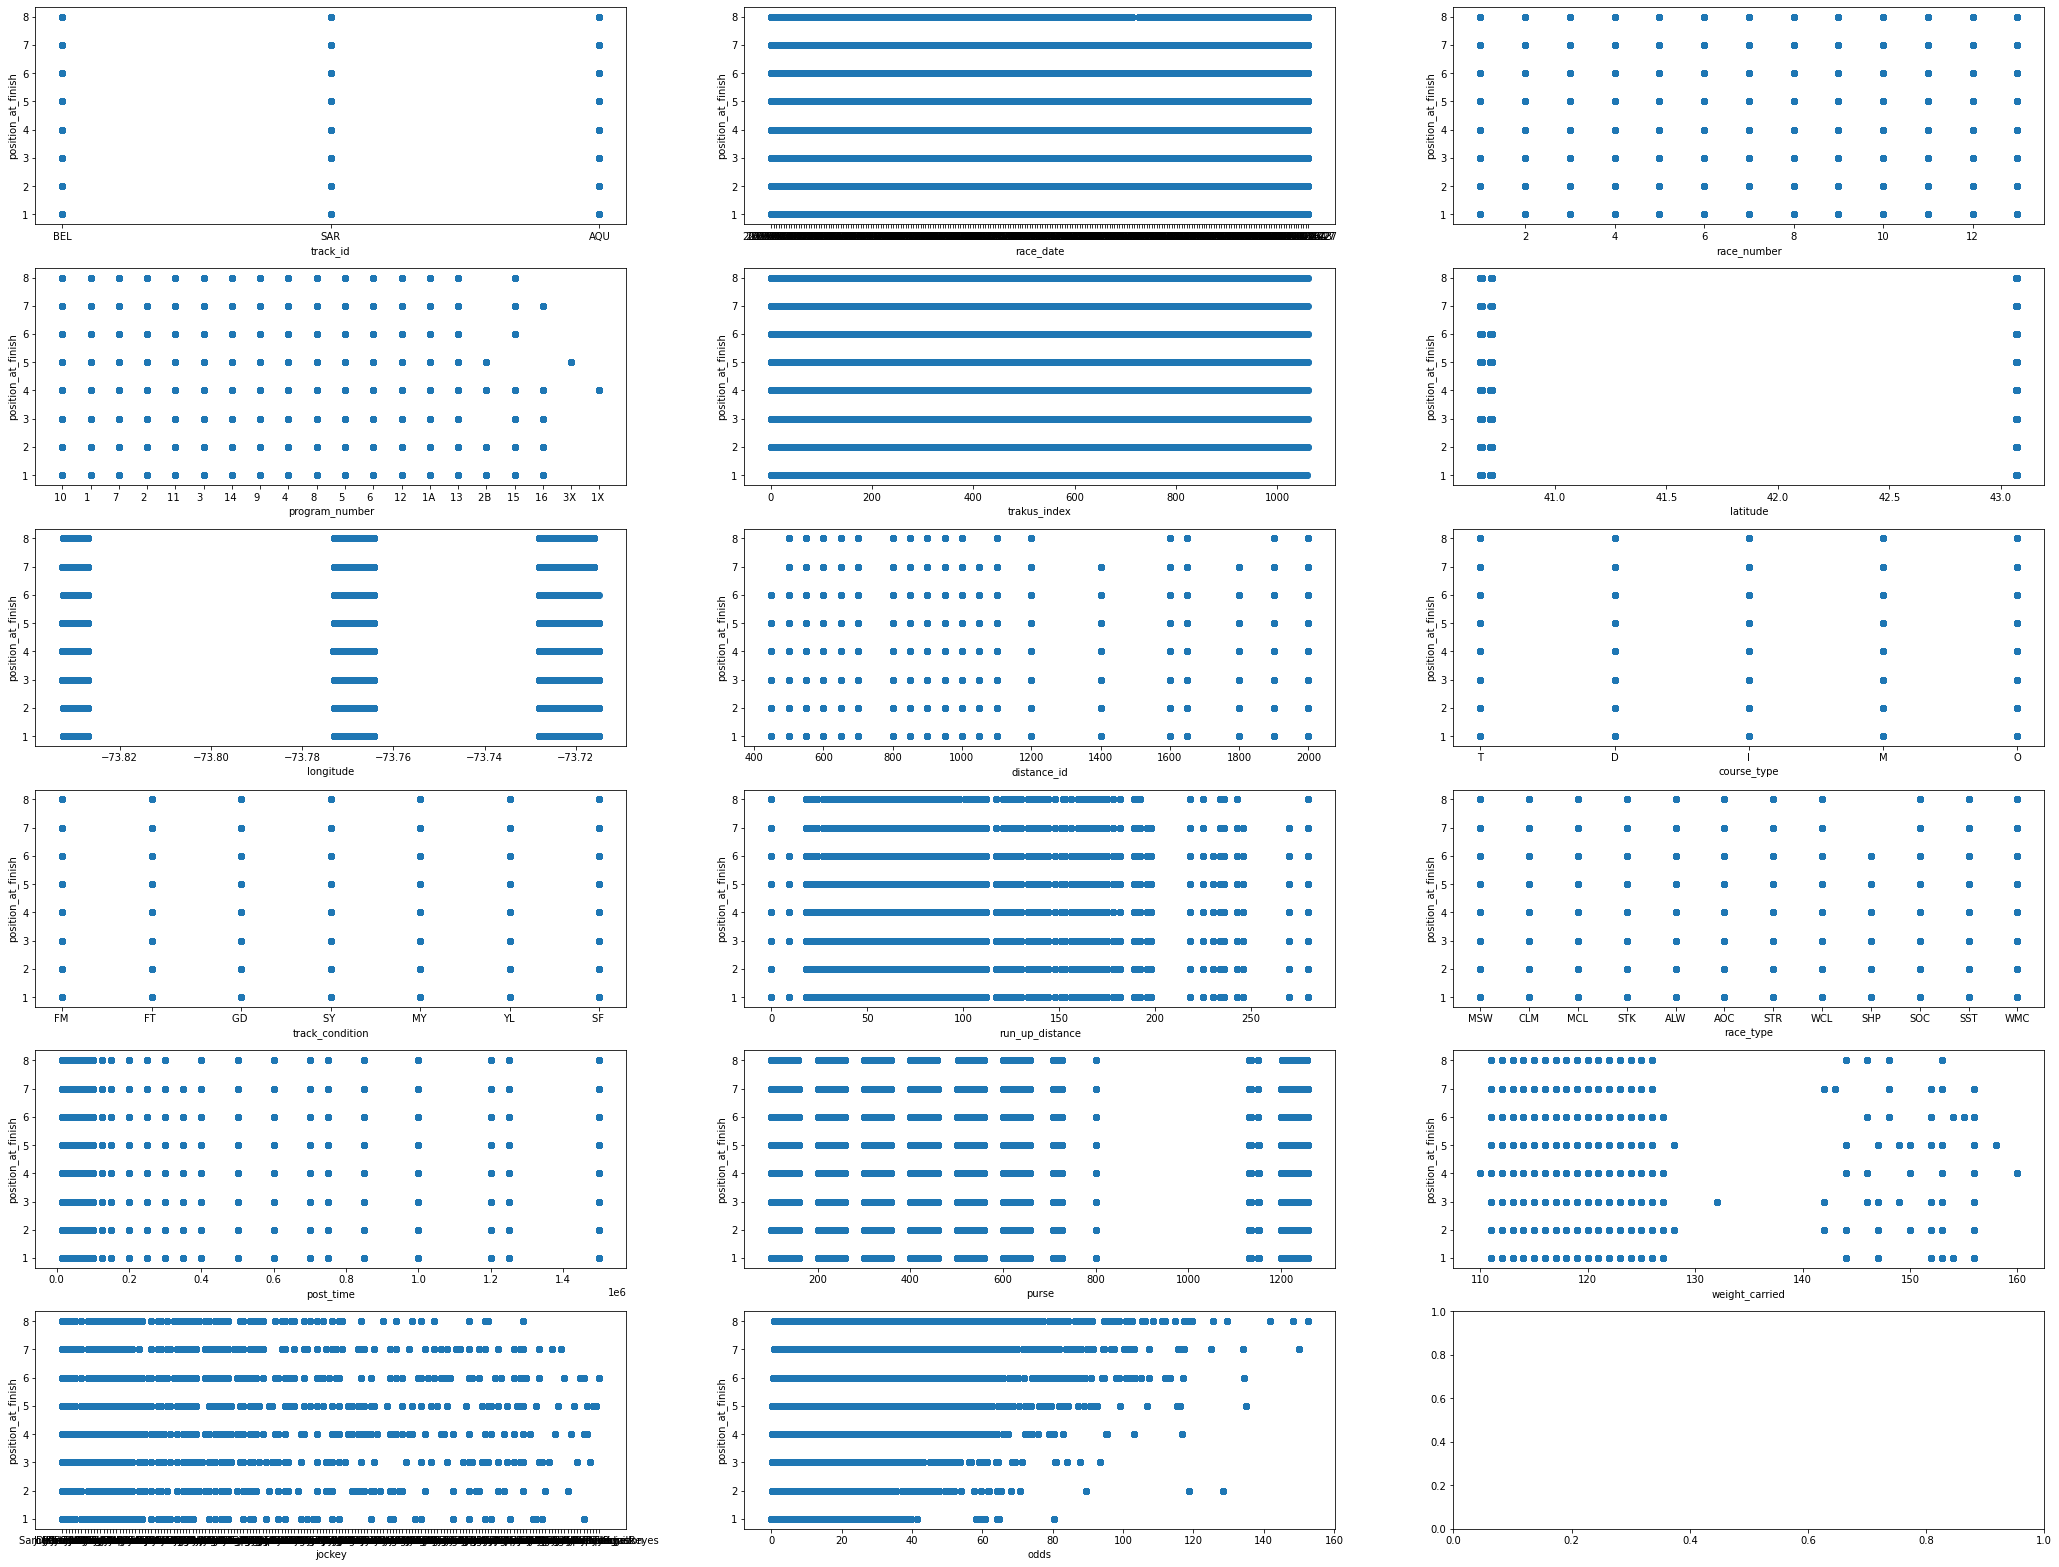

In [18]:
# Scatterplots
fig, ax = plt.subplots(ncols=3, nrows=6, figsize=(36,28))

ax[0][0].scatter(x=train['track_id'], y=train['position_at_finish'])
ax[0][0].set_xlabel('track_id')
ax[0][0].set_ylabel('position_at_finish')

ax[0][1].scatter(x=train['race_date'], y=train['position_at_finish'])
ax[0][1].set_xlabel('race_date')
ax[0][1].set_ylabel('position_at_finish')

ax[0][2].scatter(x=train['race_number'], y=train['position_at_finish'])
ax[0][2].set_xlabel('race_number')
ax[0][2].set_ylabel('position_at_finish')

ax[1][0].scatter(x=train['program_number'], y=train['position_at_finish'])
ax[1][0].set_xlabel('program_number')
ax[1][0].set_ylabel('position_at_finish')

ax[1][1].scatter(x=train['trakus_index'], y=train['position_at_finish'])
ax[1][1].set_xlabel('trakus_index')
ax[1][1].set_ylabel('position_at_finish')

ax[1][2].scatter(x=train['latitude'], y=train['position_at_finish'])
ax[1][2].set_xlabel('latitude')
ax[1][2].set_ylabel('position_at_finish')

ax[2][0].scatter(x=train['longitude'], y=train['position_at_finish'])
ax[2][0].set_xlabel('longitude')
ax[2][0].set_ylabel('position_at_finish')

ax[2][1].scatter(x=train['distance_id'], y=train['position_at_finish'])
ax[2][1].set_xlabel('distance_id')
ax[2][1].set_ylabel('position_at_finish')

ax[2][2].scatter(x=train['course_type'], y=train['position_at_finish'])
ax[2][2].set_xlabel('course_type')
ax[2][2].set_ylabel('position_at_finish')

ax[3][0].scatter(x=train['track_condition'], y=train['position_at_finish'])
ax[3][0].set_xlabel('track_condition')
ax[3][0].set_ylabel('position_at_finish')

ax[3][1].scatter(x=train['run_up_distance'], y=train['position_at_finish'])
ax[3][1].set_xlabel('run_up_distance')
ax[3][1].set_ylabel('position_at_finish')

ax[3][2].scatter(x=train['race_type'], y=train['position_at_finish'])
ax[3][2].set_xlabel('race_type')
ax[3][2].set_ylabel('position_at_finish')

ax[4][0].scatter(x=train['post_time'], y=train['position_at_finish'])
ax[4][0].set_xlabel('post_time')
ax[4][0].set_ylabel('position_at_finish')

ax[4][1].scatter(x=train['purse'], y=train['position_at_finish'])
ax[4][1].set_xlabel('purse')
ax[4][1].set_ylabel('position_at_finish')

ax[4][2].scatter(x=train['weight_carried'], y=train['position_at_finish'])
ax[4][2].set_xlabel('weight_carried')
ax[4][2].set_ylabel('position_at_finish')

ax[5][0].scatter(x=train['jockey'], y=train['position_at_finish'])
ax[5][0].set_xlabel('jockey')
ax[5][0].set_ylabel('position_at_finish')

ax[5][1].scatter(x=train['odds'], y=train['position_at_finish'])
ax[5][1].set_xlabel('odds')
ax[5][1].set_ylabel('position_at_finish');

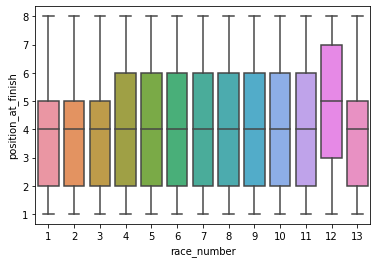

In [19]:
# Boxplot
sns.boxplot(data=train, x='race_number', y='position_at_finish');

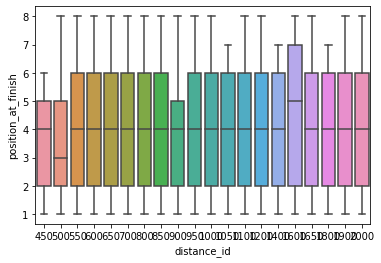

In [20]:
# Boxplot
sns.boxplot(data=train, x='distance_id', y='position_at_finish');

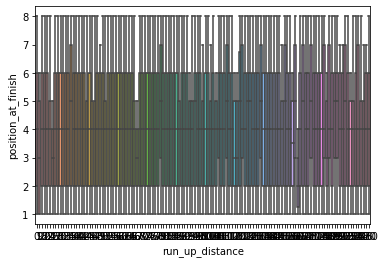

In [21]:
# Boxplot
sns.boxplot(data=train, x='run_up_distance', y='position_at_finish');

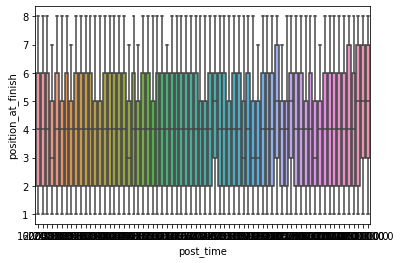

In [22]:
# Boxplot
sns.boxplot(data=train, x='post_time', y='position_at_finish');

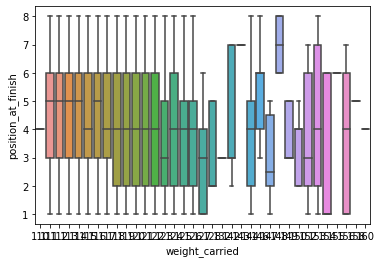

In [23]:
# Boxplot
sns.boxplot(data=train, x='weight_carried', y='position_at_finish');

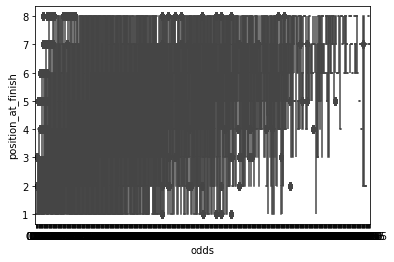

In [24]:
# Boxplot
sns.boxplot(data=train, x='odds', y='position_at_finish');

/var/folders/_k/13yzmwtx59z5kf32jd8wggxr0000gn/T/ipykernel_3058/3722024283.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr()[['position_at_finish']] \


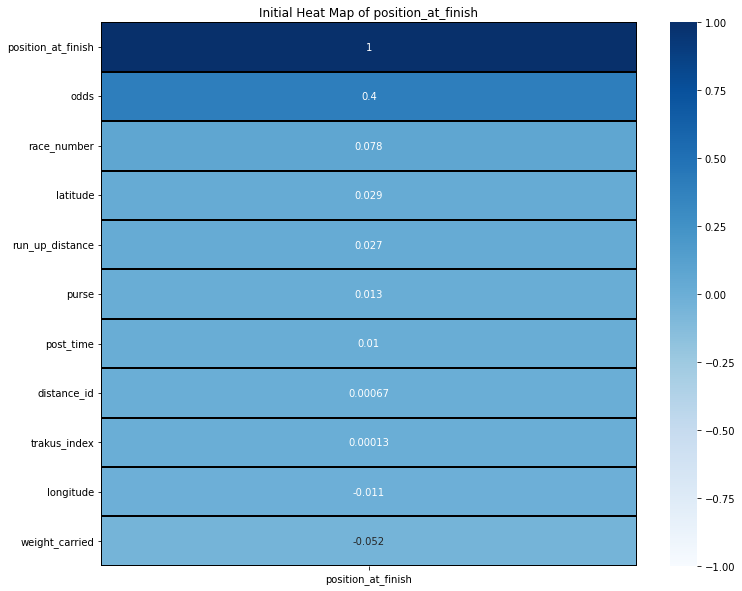

In [25]:
# Heat map of position_at_finish
plt.figure(figsize=(12,10))
plt.title('Initial Heat Map of position_at_finish')
sns.heatmap(train.corr()[['position_at_finish']] \
            .sort_values(by='position_at_finish',ascending=False),cmap='Blues',vmin=-1, \
                        vmax=1,annot=True,linecolor='black',linewidths=2);

In [26]:
# Correlation coefficient matrix
train.corr()

/var/folders/_k/13yzmwtx59z5kf32jd8wggxr0000gn/T/ipykernel_3058/3618922340.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,race_number,trakus_index,latitude,longitude,distance_id,run_up_distance,post_time,purse,weight_carried,odds,position_at_finish
race_number,1.000000,-0.015310,0.076153,0.037525,-0.006728,0.105679,0.288372,0.058129,-0.127332,0.048201,0.078037
trakus_index,-0.015310,1.000000,0.035828,0.003758,0.378847,0.025820,0.077182,0.077841,0.208741,-0.001058,0.000133
latitude,0.076153,0.035828,1.000000,0.111975,0.121680,-0.054728,0.113937,0.001587,0.129525,-0.030945,0.028998
longitude,0.037525,0.003758,0.111975,1.000000,0.116124,0.301311,0.132463,-0.055966,0.033693,-0.058046,-0.010727
distance_id,-0.006728,0.378847,0.121680,0.116124,1.000000,0.101379,0.260511,0.189285,0.520604,-0.017976,0.000673
run_up_distance,0.105679,0.025820,-0.054728,0.301311,0.101379,1.000000,0.033619,-0.037275,-0.126313,-0.004041,0.026745
post_time,0.288372,0.077182,0.113937,0.132463,0.260511,0.033619,1.000000,0.063803,0.025841,0.007612,0.010147
purse,0.058129,0.077841,0.001587,-0.055966,0.189285,-0.037275,0.063803,1.000000,0.177556,0.012692,0.013183
weight_carried,-0.127332,0.208741,0.129525,0.033693,0.520604,-0.126313,0.025841,0.177556,1.000000,-0.109285,-0.051670
odds,0.048201,-0.001058,-0.030945,-0.058046,-0.017976,-0.004041,0.007612,0.012692,-0.109285,1.000000,0.399880


### Feature Engineering - Apply separately on train and test sets.

In [27]:
# Drop 'race_date'
train.drop(columns=['race_date'], inplace=True)
test.drop(columns=['race_date'], inplace=True)

# View the df
train.head(1)

,track_id,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,post_time,purse,weight_carried,jockey,odds,position_at_finish
4479912,BEL,5,10,309,40.71405,-73.724479,800,T,FM,77,MSW,62000.0,310.0,119,Joel Rosario,1.3,1


In [28]:
# Get dummies for 'track_id'
train = pd.get_dummies(data=train, columns=['track_id'], drop_first=False)
test = pd.get_dummies(data=test, columns=['track_id'], drop_first=False)

# View code execution
train.head()
# test.head()

,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,post_time,purse,weight_carried,jockey,odds,position_at_finish,track_id_AQU,track_id_BEL,track_id_SAR
4479912,5,10,309,40.714050,-73.724479,800,T,FM,77,MSW,62000.0,310.0,119,Joel Rosario,1.30,1,0,1,0
3889890,7,1,324,43.071827,-73.771798,650,D,FT,72,CLM,52000.0,403.0,120,Dylan Davis,27.00,7,0,0,1
1878001,2,7,80,40.717644,-73.726433,600,D,FT,56,MCL,33000.0,1230.0,124,Samuel Camacho Jr.,2.05,3,0,1,0
2929237,5,2,74,43.070496,-73.772805,900,D,FT,76,MSW,90000.0,244.0,118,Jose L. Ortiz,3.05,6,0,0,1
4845113,3,7,80,40.669949,-73.828913,800,D,FT,54,MCL,35000.0,128.0,121,Samuel Camacho Jr.,23.20,5,1,0,0


In [29]:
# Frequency encode 'course_type' + 'track_condition'- nominal variables
freq_enc_0 = ce.CountEncoder(cols=['course_type'], normalize=True)
train['course_type_freq_enc'] = freq_enc_0.fit_transform(train['course_type'])
test['course_type_freq_enc'] = freq_enc_0.transform(test['course_type'])

freq_enc_1 = ce.CountEncoder(cols=['track_condition'], normalize=True)
train['track_condition_freq_enc'] = freq_enc_1.fit_transform(train['track_condition'])
test['track_condition_freq_enc'] = freq_enc_1.transform(test['track_condition'])

# Drop 'course_type' column
train.drop(columns=['course_type', 'track_condition'], inplace=True)
test.drop(columns=['course_type', 'track_condition'], inplace=True)

# View the code execution
# train.head()
test.head()

,race_number,program_number,trakus_index,latitude,longitude,distance_id,run_up_distance,race_type,post_time,purse,weight_carried,jockey,odds,position_at_finish,track_id_AQU,track_id_BEL,track_id_SAR,course_type_freq_enc,track_condition_freq_enc
3400042,7,11,156,43.069827,-73.770737,900,63,ALW,80000.0,414.0,120,Junior Alvarado,8.10,8,0,0,1,0.142126,0.254205
2749208,1,3,358,40.671810,-73.831802,800,54,MSW,68000.0,1250.0,120,Rajiv Maragh,3.45,3,1,0,0,0.634511,0.459167
3353411,3,7,182,40.674212,-73.830686,550,52,MCL,35000.0,147.0,117,Reylu Gutierrez,5.60,3,1,0,0,0.634511,0.096621
1306821,8,1,94,40.670693,-73.831540,850,81,ALW,75000.0,519.0,123,Luis R. Reyes,35.75,8,1,0,0,0.177616,0.254205
2496562,6,4,73,40.716691,-73.723790,600,148,MCL,46000.0,313.0,118,John R. Velazquez,0.70,1,0,1,0,0.142126,0.254205


In [30]:
# Frequency encode 'race_type' with Other - train
train.loc[train['race_type'] == 'CLM', 'race_type_encoded'] = 'CLM'
train.loc[train['race_type'] == 'MSW', 'race_type_encoded'] = 'MSW'
train.loc[train['race_type'] == 'MCL', 'race_type_encoded'] = 'MCL'
train.loc[train['race_type'] == 'STK', 'race_type_encoded'] = 'STK'
train.loc[train['race_type'] == 'AOC', 'race_type_encoded'] = 'AOC'
train.loc[~train['race_type'].isin(['CLM', 'MSW', 'MCL', 'STK', 'AOC']), 'race_type_encoded'] = 'Other'

# Drop 'race_type'
train.drop(columns=['race_type'], inplace=True)

# Frequency encode 'race_type' with Other - test
test.loc[test['race_type'] == 'CLM', 'race_type_encoded'] = 'CLM'
test.loc[test['race_type'] == 'MSW', 'race_type_encoded'] = 'MSW'
test.loc[test['race_type'] == 'MCL', 'race_type_encoded'] = 'MCL'
test.loc[test['race_type'] == 'STK', 'race_type_encoded'] = 'STK'
test.loc[test['race_type'] == 'AOC', 'race_type_encoded'] = 'AOC'
test.loc[~test['race_type'].isin(['CLM', 'MSW', 'MCL', 'STK', 'AOC']), 'race_type_encoded'] = 'Other'

# Drop 'race_type'
test.drop(columns=['race_type'], inplace=True)

# Frequency encoding
freq_enc_2 = ce.CountEncoder(cols=['race_type_encoded'], normalize=True)
train['race_type_freq_enc'] = freq_enc_2.fit_transform(train['race_type_encoded'])
test['race_type_freq_enc'] = freq_enc_2.transform(test['race_type_encoded'])

# Drop column
train.drop(columns=['race_type_encoded'], inplace=True)
test.drop(columns=['race_type_encoded'], inplace=True)

# View the code execution
train.head()
# test.head()

,race_number,program_number,trakus_index,latitude,longitude,distance_id,run_up_distance,post_time,purse,weight_carried,jockey,odds,position_at_finish,track_id_AQU,track_id_BEL,track_id_SAR,course_type_freq_enc,track_condition_freq_enc,race_type_freq_enc
4479912,5,10,309,40.714050,-73.724479,800,77,62000.0,310.0,119,Joel Rosario,1.30,1,0,1,0,0.177616,0.254205,0.204438
3889890,7,1,324,43.071827,-73.771798,650,72,52000.0,403.0,120,Dylan Davis,27.00,7,0,0,1,0.634511,0.459167,0.224481
1878001,2,7,80,40.717644,-73.726433,600,56,33000.0,1230.0,124,Samuel Camacho Jr.,2.05,3,0,1,0,0.634511,0.459167,0.167862
2929237,5,2,74,43.070496,-73.772805,900,76,90000.0,244.0,118,Jose L. Ortiz,3.05,6,0,0,1,0.634511,0.459167,0.204438
4845113,3,7,80,40.669949,-73.828913,800,54,35000.0,128.0,121,Samuel Camacho Jr.,23.20,5,1,0,0,0.634511,0.459167,0.167862


In [31]:
# Frequency encode 'program_number' with Other - train
train.loc[train['program_number'] == '4  ', 'program_number_encoded'] = '4  '
train.loc[train['program_number'] == '3  ', 'program_number_encoded'] = '3  '
train.loc[train['program_number'] == '5  ', 'program_number_encoded'] = '5  '
train.loc[train['program_number'] == '2  ', 'program_number_encoded'] = '2  '
train.loc[train['program_number'] == '1  ', 'program_number_encoded'] = '1  '
train.loc[train['program_number'] == '6  ', 'program_number_encoded'] = '6  '
train.loc[train['program_number'] == '7  ', 'program_number_encoded'] = '7  '
train.loc[train['program_number'] == '8  ', 'program_number_encoded'] = '8  '
train.loc[~train['program_number'].isin(['4  ', '3  ', '5  ', '2  ', '1  ', '6  ', '7  ', '8  ']), \
          'program_number_encoded'] = 'Other'

# Drop 'program_number'
train.drop(columns=['program_number'], inplace=True)

# Frequency encode 'program_number' with Other - test
test.loc[test['program_number'] == '4  ', 'program_number_encoded'] = '4  '
test.loc[test['program_number'] == '3  ', 'program_number_encoded'] = '3  '
test.loc[test['program_number'] == '5  ', 'program_number_encoded'] = '5  '
test.loc[test['program_number'] == '2  ', 'program_number_encoded'] = '2  '
test.loc[test['program_number'] == '1  ', 'program_number_encoded'] = '1  '
test.loc[test['program_number'] == '6  ', 'program_number_encoded'] = '6  '
test.loc[test['program_number'] == '7  ', 'program_number_encoded'] = '7  '
test.loc[test['program_number'] == '8  ', 'program_number_encoded'] = '8  '
test.loc[~test['program_number'].isin(['4  ', '3  ', '5  ', '2  ', '1  ', '6  ', '7  ', '8  ']), \
          'program_number_encoded'] = 'Other'

# Drop 'program_number'
test.drop(columns=['program_number'], inplace=True)

# Frequency encoding
freq_enc_3 = ce.CountEncoder(cols=['program_number_encoded'], normalize=True)
train['program_number_freq_enc'] = freq_enc_3.fit_transform(train['program_number_encoded'])
test['program_number_freq_enc'] = freq_enc_3.transform(test['program_number_encoded'])

# Drop column
train.drop(columns=['program_number_encoded'], inplace=True)
test.drop(columns=['program_number_encoded'], inplace=True)

# View the code execution
train.head()
# test.head()

,race_number,trakus_index,latitude,longitude,distance_id,run_up_distance,post_time,purse,weight_carried,jockey,odds,position_at_finish,track_id_AQU,track_id_BEL,track_id_SAR,course_type_freq_enc,track_condition_freq_enc,race_type_freq_enc,program_number_freq_enc
4479912,5,309,40.714050,-73.724479,800,77,62000.0,310.0,119,Joel Rosario,1.30,1,0,1,0,0.177616,0.254205,0.204438,0.128281
3889890,7,324,43.071827,-73.771798,650,72,52000.0,403.0,120,Dylan Davis,27.00,7,0,0,1,0.634511,0.459167,0.224481,0.117107
1878001,2,80,40.717644,-73.726433,600,56,33000.0,1230.0,124,Samuel Camacho Jr.,2.05,3,0,1,0,0.634511,0.459167,0.167862,0.094014
2929237,5,74,43.070496,-73.772805,900,76,90000.0,244.0,118,Jose L. Ortiz,3.05,6,0,0,1,0.634511,0.459167,0.204438,0.118758
4845113,3,80,40.669949,-73.828913,800,54,35000.0,128.0,121,Samuel Camacho Jr.,23.20,5,1,0,0,0.634511,0.459167,0.167862,0.094014


In [32]:
# Rank by mean encode 'jockey'

# Create {jockey: rank} dictionary
rank_df = pd.DataFrame(train.groupby(by=['jockey'])[['position_at_finish']].mean().rank())
rank_df['jockey'] = rank_df.index
rank_dict = dict(zip(rank_df['jockey'], rank_df['position_at_finish']))

# Map dictionary to 'jockey' column - train
train['jockey_ranked'] = train['jockey'].map(rank_dict)

## Map dictionary to 'jockey' column - test
test['jockey_ranked'] = test['jockey'].map(rank_dict)

# Drop 'jockey' column
train.drop(columns=['jockey'], inplace=True)
test.drop(columns=['jockey'], inplace=True)

# Check code execution
train.head()

,race_number,trakus_index,latitude,longitude,distance_id,run_up_distance,post_time,purse,weight_carried,odds,position_at_finish,track_id_AQU,track_id_BEL,track_id_SAR,course_type_freq_enc,track_condition_freq_enc,race_type_freq_enc,program_number_freq_enc,jockey_ranked
4479912,5,309,40.714050,-73.724479,800,77,62000.0,310.0,119,1.30,1,0,1,0,0.177616,0.254205,0.204438,0.128281,41.0
3889890,7,324,43.071827,-73.771798,650,72,52000.0,403.0,120,27.00,7,0,0,1,0.634511,0.459167,0.224481,0.117107,72.0
1878001,2,80,40.717644,-73.726433,600,56,33000.0,1230.0,124,2.05,3,0,1,0,0.634511,0.459167,0.167862,0.094014,106.0
2929237,5,74,43.070496,-73.772805,900,76,90000.0,244.0,118,3.05,6,0,0,1,0.634511,0.459167,0.204438,0.118758,38.0
4845113,3,80,40.669949,-73.828913,800,54,35000.0,128.0,121,23.20,5,1,0,0,0.634511,0.459167,0.167862,0.094014,106.0


In [33]:
# Check for missing values
train.isnull().sum()

race_number                 0
trakus_index                0
latitude                    0
longitude                   0
distance_id                 0
run_up_distance             0
post_time                   0
purse                       0
weight_carried              0
odds                        0
position_at_finish          0
track_id_AQU                0
track_id_BEL                0
track_id_SAR                0
course_type_freq_enc        0
track_condition_freq_enc    0
race_type_freq_enc          0
program_number_freq_enc     0
jockey_ranked               0
dtype: int64

In [34]:
# Check for missing values
test.isnull().sum()

race_number                 0
trakus_index                0
latitude                    0
longitude                   0
distance_id                 0
run_up_distance             0
post_time                   0
purse                       0
weight_carried              0
odds                        0
position_at_finish          0
track_id_AQU                0
track_id_BEL                0
track_id_SAR                0
course_type_freq_enc        0
track_condition_freq_enc    0
race_type_freq_enc          0
program_number_freq_enc     0
jockey_ranked               0
dtype: int64

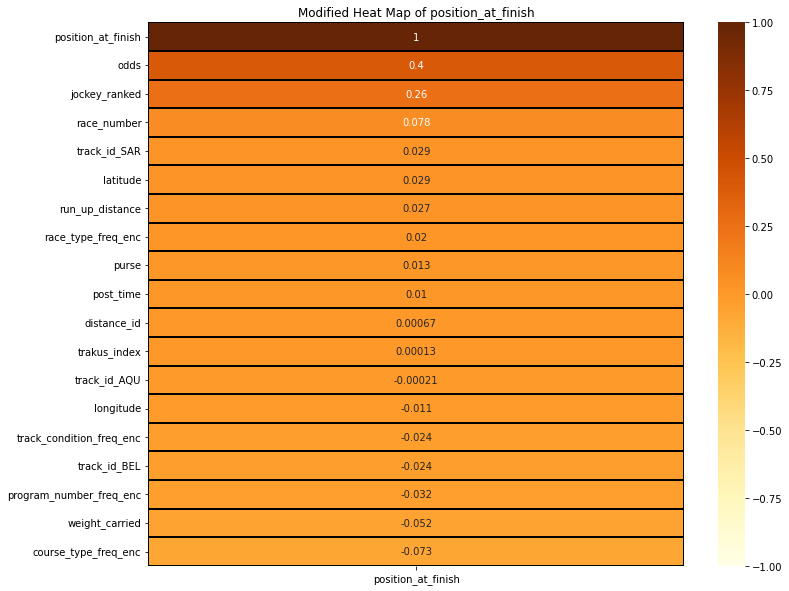

In [35]:
# Heat map of position_at_finish
plt.figure(figsize=(12,10))
plt.title('Modified Heat Map of position_at_finish')
sns.heatmap(train.corr()[['position_at_finish']] \
            .sort_values(by='position_at_finish',ascending=False),cmap='YlOrBr',vmin=-1, \
                        vmax=1,annot=True,linecolor='black',linewidths=2);

In [36]:
# Correlation coefficient matrix
train.corr()

,race_number,trakus_index,latitude,longitude,distance_id,run_up_distance,post_time,purse,weight_carried,odds,position_at_finish,track_id_AQU,track_id_BEL,track_id_SAR,course_type_freq_enc,track_condition_freq_enc,race_type_freq_enc,program_number_freq_enc,jockey_ranked
race_number,1.000000,-0.015310,0.076153,0.037525,-0.006728,0.105679,0.288372,0.058129,-0.127332,0.048201,0.078037,-0.059773,-0.003040,0.075591,-0.106484,-0.034404,-0.261922,-0.024356,-0.080230
trakus_index,-0.015310,1.000000,0.035828,0.003758,0.378847,0.025820,0.077182,0.077841,0.208741,-0.001058,0.000133,-0.028805,-0.000669,0.035484,-0.098409,-0.053862,-0.060266,-0.001582,-0.007050
latitude,0.076153,0.035828,1.000000,0.111975,0.121680,-0.054728,0.113937,0.001587,0.129525,-0.030945,0.028998,-0.450847,-0.385184,0.999808,-0.132649,0.002175,-0.049043,-0.010574,-0.128595
longitude,0.037525,0.003758,0.111975,1.000000,0.116124,0.301311,0.132463,-0.055966,0.033693,-0.058046,-0.010727,-0.936324,0.872723,0.092573,-0.299615,-0.118529,-0.046778,0.002736,-0.171298
distance_id,-0.006728,0.378847,0.121680,0.116124,1.000000,0.101379,0.260511,0.189285,0.520604,-0.017976,0.000673,-0.144766,0.045940,0.119861,-0.322054,-0.137543,-0.189687,-0.005388,-0.060383
run_up_distance,0.105679,0.025820,-0.054728,0.301311,0.101379,1.000000,0.033619,-0.037275,-0.126313,-0.004041,0.026745,-0.250870,0.305910,-0.060687,-0.440109,-0.226553,-0.068323,-0.010288,-0.121148
post_time,0.288372,0.077182,0.113937,0.132463,0.260511,0.033619,1.000000,0.063803,0.025841,0.007612,0.010147,-0.157603,0.065910,0.111635,-0.073628,0.021794,-0.275216,-0.012501,-0.133602
purse,0.058129,0.077841,0.001587,-0.055966,0.189285,-0.037275,0.063803,1.000000,0.177556,0.012692,0.013183,0.049913,-0.052973,0.002715,-0.091453,-0.061175,-0.042727,0.010683,0.001522
weight_carried,-0.127332,0.208741,0.129525,0.033693,0.520604,-0.126313,0.025841,0.177556,1.000000,-0.109285,-0.051670,-0.075210,-0.032531,0.129160,-0.185588,-0.057421,-0.121498,-0.003146,-0.069637
odds,0.048201,-0.001058,-0.030945,-0.058046,-0.017976,-0.004041,0.007612,0.012692,-0.109285,1.000000,0.399880,0.063224,-0.039011,-0.029875,-0.017715,0.005849,0.033374,-0.027349,0.457872


In [37]:
# View the training set
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3862873 entries, 4479912 to 4536143
Data columns (total 19 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   race_number               int64  
 1   trakus_index              int64  
 2   latitude                  float64
 3   longitude                 float64
 4   distance_id               int64  
 5   run_up_distance           int64  
 6   post_time                 float64
 7   purse                     float64
 8   weight_carried            int64  
 9   odds                      float64
 10  position_at_finish        int64  
 11  track_id_AQU              uint8  
 12  track_id_BEL              uint8  
 13  track_id_SAR              uint8  
 14  course_type_freq_enc      float64
 15  track_condition_freq_enc  float64
 16  race_type_freq_enc        float64
 17  program_number_freq_enc   float64
 18  jockey_ranked             float64
dtypes: float64(10), int64(6), uint8(3)
memory usage: 512.1 MB

In [38]:
# View the test set
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965719 entries, 3400042 to 3507572
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   race_number               965719 non-null  int64  
 1   trakus_index              965719 non-null  int64  
 2   latitude                  965719 non-null  float64
 3   longitude                 965719 non-null  float64
 4   distance_id               965719 non-null  int64  
 5   run_up_distance           965719 non-null  int64  
 6   post_time                 965719 non-null  float64
 7   purse                     965719 non-null  float64
 8   weight_carried            965719 non-null  int64  
 9   odds                      965719 non-null  float64
 10  position_at_finish        965719 non-null  int64  
 11  track_id_AQU              965719 non-null  uint8  
 12  track_id_BEL              965719 non-null  uint8  
 13  track_id_SAR              965719 non-

## Modeling

In [39]:
# Model imports
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import classification_report, roc_auc_score
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

### Model 0: The Null Model

In [40]:
# Null model - slightly imbalanced classes (expected proportion: 12.5%, majority class: 2)
train['position_at_finish'].value_counts(normalize=True)

2    0.145724
1    0.145635
3    0.145336
4    0.144673
5    0.141375
6    0.122844
7    0.091309
8    0.063102
Name: position_at_finish, dtype: float64

### Model 1: AdaBoost Classifier

Multinomial logistic regression was initially attempted, but the model could not converge.

In [41]:
# # Time start
# start_time = time.time()

# # Define features
# features = [col for col in train.columns if col != 'position_at_finish']

# # Define X and y
# X_train = train[features]
# y_train = train['position_at_finish']
# X_test = test[features]
# y_test = test['position_at_finish']

# # Instantiate the model
# abc = AdaBoostClassifier(random_state=7406)

# # Fit the model
# abc.fit(X_train, y_train)

# # Time end, 226.022 seconds (3.77 mins)
# elapsed_time = time.time() - start_time
# print(f"Elapsed time to compute: {elapsed_time:.3f} seconds")

In [42]:
# # Predict y values
# abc_y_pred = abc.predict(X_test)

In [43]:
# # Classification report
# print(classification_report(y_test, abc_y_pred))

In [44]:
# # AUC ROC
# y_pred_probs_abc = abc.predict_proba(X_test)
# weighted_roc_auc_ovr_abc = roc_auc_score(y_test, y_pred_probs_abc, average='weighted', multi_class='ovr')
# print(f"Weighted-averaged one-vs-rest ROC AUC score: {weighted_roc_auc_ovr_abc:.2f}")

In [45]:
# # Plot sorted feature importances
# importances = abc.feature_importances_
# abc_importances = pd.Series(importances, index=list(X_train.columns))
# sorted_abc_importances = abc_importances.sort_values(ascending=False)

# fig, ax = plt.subplots(figsize=(10,8))
# sorted_abc_importances.plot.bar(ax=ax)
# ax.set_title("Feature Importances Using Gini Importance")
# ax.set_ylabel("Gini Importance")
# ax.set_xlabel("Feature")
# fig.tight_layout()

### Model 1: AdaBoost Classifier - Version 2

In [47]:
# Time start
start_time = time.time()

# Define features
features = ['odds', 'jockey_ranked', 'weight_carried', 'program_number_freq_enc', 
            'race_number', 'distance_id', 'race_type_freq_enc', 'latitude', 'course_type_freq_enc']

# Define X and y
X_train = train[features]
y_train = train['position_at_finish']
X_test = test[features]
y_test = test['position_at_finish']

# Instantiate the model
abc = AdaBoostClassifier(random_state=7406)

# Set up parameters
base1 = DecisionTreeClassifier(max_depth=1)
base2 = DecisionTreeClassifier(max_depth=2)
base3 = DecisionTreeClassifier(max_depth=3)
abc_params = {
    'estimator': [base1, base2, base3]
}

# Gridsearch
gs_abc = GridSearchCV(abc, param_grid=abc_params, cv=2)

# Fit the model
gs_abc.fit(X_train, y_train)

# Time end, 1008.609 seconds
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute: {elapsed_time:.3f} seconds")

Elapsed time to compute: 1008.609 seconds


In [50]:
# Best parameters
gs_abc.best_params_

{'estimator': DecisionTreeClassifier(max_depth=3)}

In [53]:
# Time start
start_time = time.time()

# Instantiate the model with the best parameters
abc = AdaBoostClassifier(random_state=7406, **gs_abc.best_params_)

# Fit the model
abc.fit(X_train, y_train)

# Time end, 304.525 seconds
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute: {elapsed_time:.3f} seconds")

Elapsed time to compute: 304.525 seconds


In [54]:
# Predict y values
abc_y_pred = abc.predict(X_test)

In [55]:
# Classification report
print(classification_report(y_test, abc_y_pred))

              precision    recall  f1-score   support

           1       0.32      0.46      0.37    140792
           2       0.25      0.20      0.22    140851
           3       0.22      0.20      0.21    140611
           4       0.22      0.23      0.22    140132
           5       0.21      0.22      0.21    135872
           6       0.23      0.18      0.20    118500
           7       0.20      0.17      0.18     87957
           8       0.23      0.26      0.24     61004

    accuracy                           0.24    965719
   macro avg       0.23      0.24      0.23    965719
weighted avg       0.24      0.24      0.24    965719



In [56]:
# AUC ROC
y_pred_probs_abc = abc.predict_proba(X_test)
weighted_roc_auc_ovr_abc = roc_auc_score(y_test, y_pred_probs_abc, average='weighted', multi_class='ovr')
print(f"Weighted-averaged one-vs-rest ROC AUC score: {weighted_roc_auc_ovr_abc:.2f}")

Weighted-averaged one-vs-rest ROC AUC score: 0.64


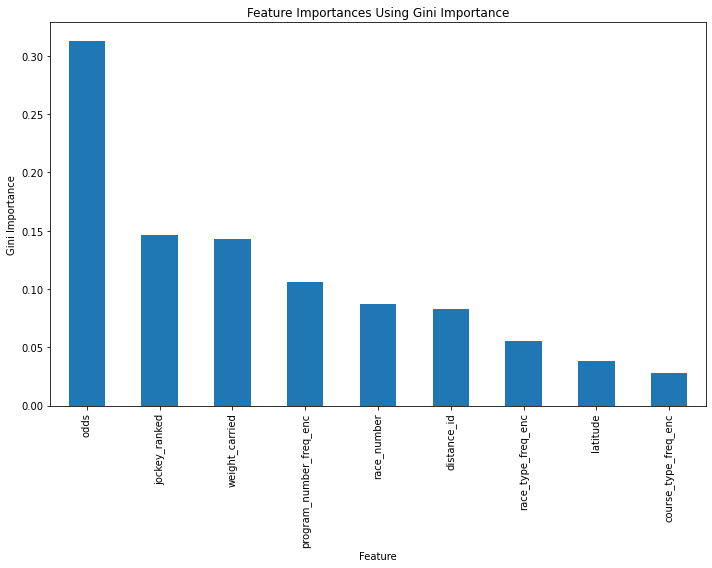

In [57]:
# Plot sorted feature importances
importances = abc.feature_importances_
abc_importances = pd.Series(importances, index=features)
sorted_abc_importances = abc_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,8))
sorted_abc_importances.plot.bar(ax=ax)
ax.set_title("Feature Importances Using Gini Importance")
ax.set_ylabel("Gini Importance")
ax.set_xlabel("Feature")
fig.tight_layout()

In [58]:
# Time start
start_time = time.time()

# Cross validation
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

scores = cross_val_score(abc, X, y, cv=5, scoring='roc_auc_ovr_weighted')
print(scores)
print(scores.mean())

# Time end, 1572.649 seconds
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute: {elapsed_time:.3f} seconds")

[0.63400513 0.63826237 0.63313398 0.63366797 0.63741606]
0.635297104212483
Elapsed time to compute: 1572.649 seconds


### Model 2: XGBoost Classifier

Originally, I was going to implement KNN, but given the large datasets, KNN is computationally expensive and takes too long to compute.

In [59]:
# # Time start
# start_time = time.time()

# # Define features
# features = [col for col in train.columns if col != 'position_at_finish']

# # Define X and y
# X_train = train[features]
# y_train = train['position_at_finish'] - 1
# X_test = test[features]
# y_test = test['position_at_finish'] - 1

# # Instantiate the model
# xgbc = xgb.XGBClassifier()

# # Fit the model
# xgbc.fit(X_train, y_train)

# # Time end, 2288.773 seconds (38.15 mins)
# elapsed_time = time.time() - start_time
# print(f"Elapsed time to compute: {elapsed_time:.3f} seconds")

In [60]:
# # Predicted y values
# xgbc_y_pred = xgbc.predict(X_test)

In [61]:
# # Classification report
# print(classification_report(y_test, xgbc_y_pred))

In [62]:
# # AUC ROC
# y_pred_probs_xgbc = xgbc.predict_proba(X_test)
# weighted_roc_auc_ovr_xgbc = roc_auc_score(y_test, y_pred_probs_xgbc, average='weighted', multi_class='ovr')
# print(f"Weighted-averaged one-vs-rest ROC AUC score: {weighted_roc_auc_ovr_xgbc:.2f}")

### Model 2: XGBoost Classifier - Version 2

In [63]:
# Time start
start_time = time.time()

# Define features
features = [col for col in train.columns if col != 'position_at_finish']

# Define X and y
X_train = train[features]
y_train = train['position_at_finish'] - 1
X_test = test[features]
y_test = test['position_at_finish'] - 1

# Instantiate the model
xgbc = xgb.XGBClassifier(tree_method="hist")

# Fit the model
xgbc.fit(X_train, y_train)

# Time end, 133.997 seconds
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute: {elapsed_time:.3f} seconds")

Elapsed time to compute: 133.997 seconds


In [64]:
# Predicted y values
xgbc_y_pred = xgbc.predict(X_test)

In [65]:
# Classification report
print(classification_report(y_test, xgbc_y_pred))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80    140792
           1       0.78      0.78      0.78    140851
           2       0.78      0.77      0.78    140611
           3       0.78      0.76      0.77    140132
           4       0.80      0.80      0.80    135872
           5       0.84      0.78      0.81    118500
           6       0.90      0.81      0.85     87957
           7       0.92      0.90      0.91     61004

    accuracy                           0.80    965719
   macro avg       0.82      0.81      0.81    965719
weighted avg       0.80      0.80      0.80    965719



In [66]:
# AUC ROC
y_pred_probs_xgbc = xgbc.predict_proba(X_test)
weighted_roc_auc_ovr_xgbc = roc_auc_score(y_test, y_pred_probs_xgbc, average='weighted', multi_class='ovr')
print(f"Weighted-averaged one-vs-rest ROC AUC score: {weighted_roc_auc_ovr_xgbc:.2f}")

Weighted-averaged one-vs-rest ROC AUC score: 0.97


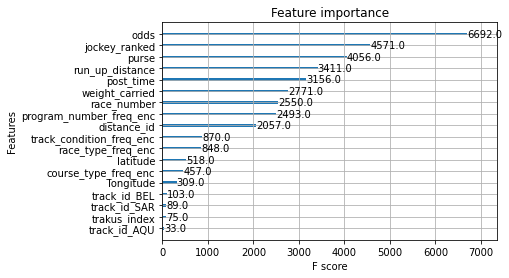

In [67]:
# Plot feature importances
plot_importance(xgbc)
plt.show()

In [68]:
# Time start
start_time = time.time()

# Cross validation
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

scores = cross_val_score(xgbc, X, y, cv=5, scoring='roc_auc_ovr_weighted')
print(scores)
print(scores.mean())

# Time end, 712.232 seconds
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute: {elapsed_time:.3f} seconds")

[0.96395176 0.96781224 0.9682283  0.96545969 0.96540555]
0.9661715089763951
Elapsed time to compute: 712.232 seconds


### Model 3: Random Forest Classifier

In [69]:
# # Time start
# start_time = time.time()

# # Define features
# features = [col for col in train.columns if col != 'position_at_finish']

# # Define X and y
# X_train = train[features]
# y_train = train['position_at_finish']
# X_test = test[features]
# y_test = test['position_at_finish']

# # Instantiate random forest classifier
# rfc = RandomForestClassifier(random_state=7406)

# # Fit the model
# rfc.fit(X_train, y_train)

# # Time end, 800.360 seconds (13.34 mins)
# elapsed_time = time.time() - start_time
# print(f"Elapsed time to compute: {elapsed_time:.3f} seconds")

In [70]:
# # Predict y values
# rfc_y_pred = rfc.predict(X_test)

In [71]:
# # Classification report
# print(classification_report(y_test, rfc_y_pred))

In [72]:
# # AUC ROC
# y_pred_probs = rfc.predict_proba(X_test)
# weighted_roc_auc_ovr = roc_auc_score(y_test, y_pred_probs, average='weighted', multi_class='ovr')
# print(f"Weighted-averaged one-vs-rest ROC AUC score: {weighted_roc_auc_ovr:.2f}")

In [73]:
# # Plot sorted feature importances
# importances = rfc.feature_importances_
# rfc_importances = pd.Series(importances, index=list(X_train.columns))
# sorted_rfc_importances = rfc_importances.sort_values(ascending=False)

# fig, ax = plt.subplots(figsize=(10,8))
# sorted_rfc_importances.plot.bar(ax=ax)
# ax.set_title("Feature Importances Using Gini Importance")
# ax.set_ylabel("Gini Importance")
# ax.set_xlabel("Feature")
# fig.tight_layout()

### Model 3: Random Forest Classifier - Version 2

In [74]:
# Time start
start_time = time.time()

# Define features
features = ['odds', 'jockey_ranked', 'purse', 'program_number_freq_enc', 'run_up_distance',
           'post_time', 'weight_carried', 'race_number', 'distance_id', 'race_type_freq_enc',
           'track_condition_freq_enc']

# Define X and y
X_train = train[features]
y_train = train['position_at_finish']
X_test = test[features]
y_test = test['position_at_finish']

# Instantiate random forest classifier
rfc = RandomForestClassifier(random_state=7406, n_jobs=-1,
                            n_estimators=50, min_samples_leaf=20, oob_score=True)

# Fit the model
rfc.fit(X_train, y_train)

# Time end, 152.160 seconds
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute: {elapsed_time:.3f} seconds")

Elapsed time to compute: 152.160 seconds


In [75]:
# Predict y values
rfc_y_pred = rfc.predict(X_test)

In [76]:
# Classification report
print(classification_report(y_test, rfc_y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    140792
           2       1.00      1.00      1.00    140851
           3       1.00      1.00      1.00    140611
           4       1.00      1.00      1.00    140132
           5       1.00      1.00      1.00    135872
           6       1.00      1.00      1.00    118500
           7       1.00      1.00      1.00     87957
           8       1.00      1.00      1.00     61004

    accuracy                           1.00    965719
   macro avg       1.00      1.00      1.00    965719
weighted avg       1.00      1.00      1.00    965719



In [77]:
# AUC ROC
y_pred_probs = rfc.predict_proba(X_test)
weighted_roc_auc_ovr = roc_auc_score(y_test, y_pred_probs, average='weighted', multi_class='ovr')
print(f"Weighted-averaged one-vs-rest ROC AUC score: {weighted_roc_auc_ovr:.2f}")

Weighted-averaged one-vs-rest ROC AUC score: 1.00


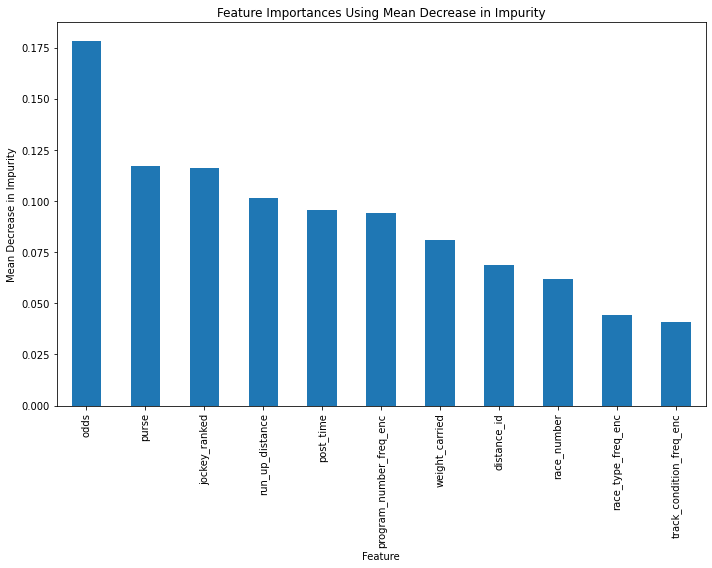

In [78]:
# Plot sorted feature importances
importances = rfc.feature_importances_
rfc_importances = pd.Series(importances, index=features)
sorted_rfc_importances = rfc_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,8))
sorted_rfc_importances.plot.bar(ax=ax)
ax.set_title("Feature Importances Using Mean Decrease in Impurity")
ax.set_ylabel("Mean Decrease in Impurity")
ax.set_xlabel("Feature")
fig.tight_layout()

In [79]:
# OOB Score
rfc.oob_score_

0.9999932692583992

In [80]:
# Time start
start_time = time.time()

# Cross validation
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

scores = cross_val_score(rfc, X, y, cv=5, scoring='roc_auc_ovr_weighted')
print(scores)
print(scores.mean())

# Time end, 809.626 seconds
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute: {elapsed_time:.3f} seconds")

[1. 1. 1. 1. 1.]
0.9999999999357648
Elapsed time to compute: 809.626 seconds


# -- END --